<a href="https://colab.research.google.com/github/archi-c0der/Colorado_motor-Data-Analysis_project/blob/main/colorado_motor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded=files.upload

In [13]:
import pandas as pd


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
file_path = '/content/colorado_motor_vehicle_sales.csv'
data= pd.read_csv(file_path)
print(data.head())

   year  quarter              county      sales
0  2008        1               Adams  231609000
1  2008        1            Arapahoe  550378000
2  2008        1  Boulder/Broomfield  176771000
3  2008        1              Denver  200103000
4  2008        1             Douglas   93259000


In [17]:
data.isnull().sum()
data = data.dropna()
data = data.drop_duplicates()
data.columns = data.columns.str.strip().str.lower()
print(data.columns)

Index(['year', 'quarter', 'county', 'sales'], dtype='object')


In [18]:
print(data.dtypes)

year        int64
quarter     int64
county     object
sales       int64
dtype: object


In [19]:
data['year']= data['year'].astype(int)
data['quarter']=data['quarter'].astype(str)
data['sales']= pd.to_numeric(data['sales'], errors='coerce')

In [20]:
print(data.describe())

              year         sales
count   501.000000  5.010000e+02
mean   2011.570858  1.760585e+08
std       2.266599  1.642055e+08
min    2008.000000  6.274000e+06
25%    2010.000000  6.148200e+07
50%    2012.000000  1.385820e+08
75%    2014.000000  2.241580e+08
max    2015.000000  9.169100e+08


In [21]:
#Group by year and quarter to see sales trend
sales_by_year_quarter = data.groupby(['year','quarter'])['sales'].sum().reset_index()
print(sales_by_year_quarter)

    year quarter       sales
0   2008       1  2407552000
1   2008       2  2427936000
2   2008       3  2300541000
3   2008       4  1829532000
4   2009       1  1657155000
5   2009       2  1826950000
6   2009       3  2223123000
7   2009       4  1945272000
8   2010       1  1904579000
9   2010       2  2111542000
10  2010       3  2311231000
11  2010       4  2228736000
12  2011       1  2957148000
13  2011       2  3241654000
14  2011       3  3470846000
15  2011       4  2500793000
16  2012       1  2547108000
17  2012       2  2738843000
18  2012       3  2885037000
19  2012       4  2789888000
20  2013       1  2675387000
21  2013       2  3022493000
22  2013       3  3183370000
23  2013       4  3119365000
24  2014       1  2936644000
25  2014       2  3331042000
26  2014       3  3624346000
27  2014       4  3500455000
28  2015       1  3291273000
29  2015       2  3642834000
30  2015       3  3916440000
31  2015       4  3656185000


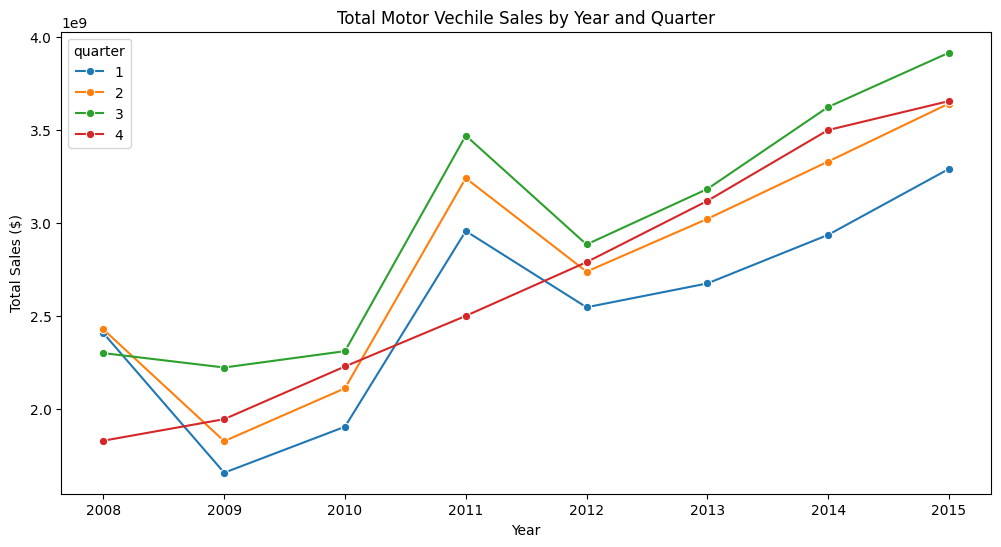

In [22]:
# plot total sales over the years and quartes
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='sales',data=sales_by_year_quarter,hue='quarter',marker='o')
plt.title('Total Motor Vechile Sales by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.show()

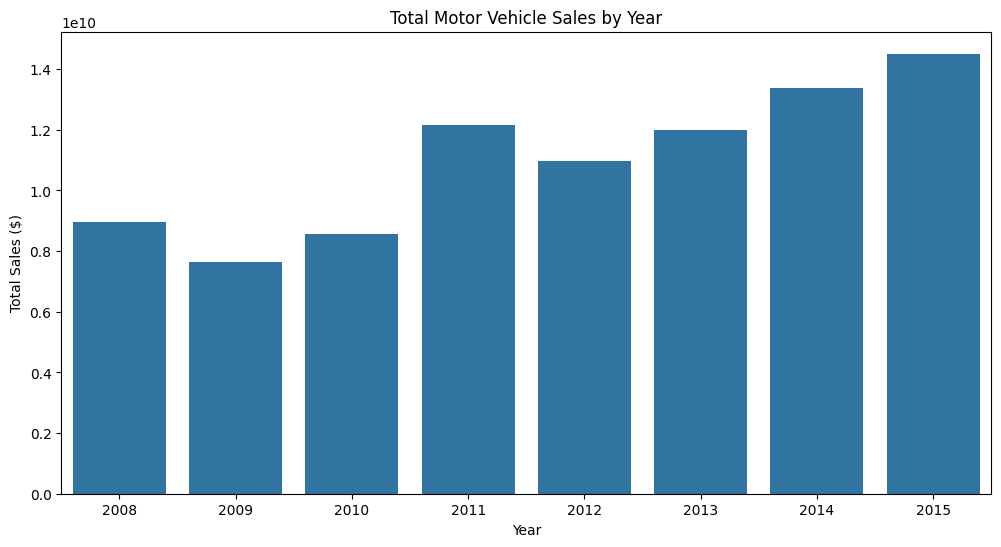

In [23]:
# Group by year to see total sales per year
sales_by_year = data.groupby('year')['sales'].sum().reset_index()

# Plot total sales per year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='sales', data=sales_by_year)
plt.title('Total Motor Vehicle Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.show()

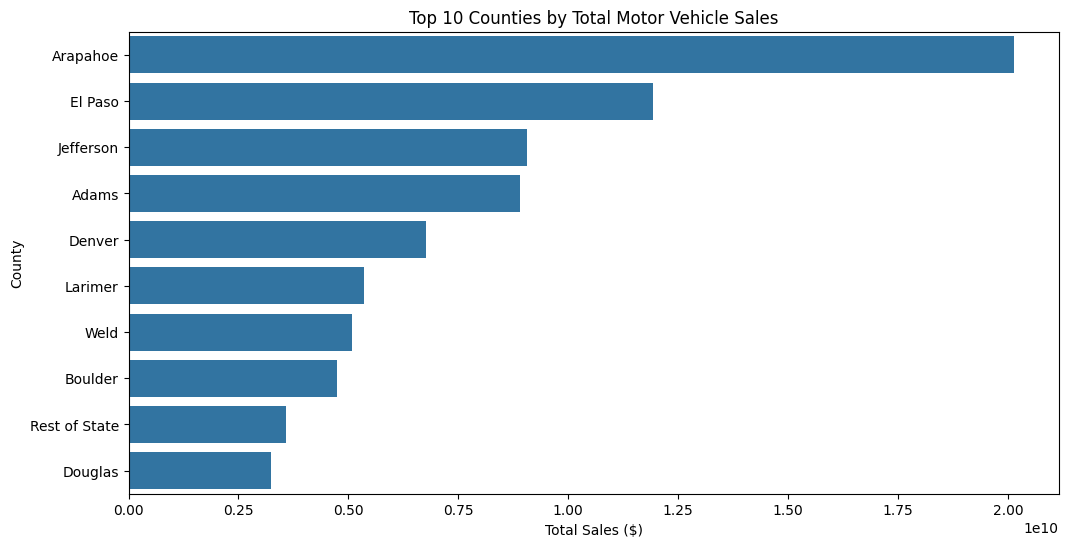

In [24]:
# Sales by county
sales_by_county = data.groupby('county')['sales'].sum().reset_index()

# Sort counties by sales
sales_by_county = sales_by_county.sort_values(by='sales', ascending=False)

# Plot sales by county
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='county', data=sales_by_county.head(10))  # Top 10 counties by sales
plt.title('Top 10 Counties by Total Motor Vehicle Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('County')
plt.show()

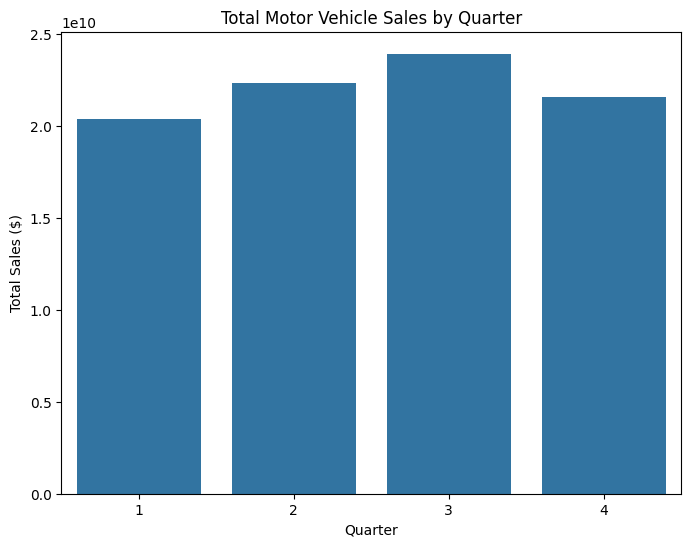

In [25]:
# Aggregate sales by quarter across all years
sales_by_quarter = data.groupby('quarter')['sales'].sum().reset_index()

# Plot sales distribution by quarter
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='sales', data=sales_by_quarter)
plt.title('Total Motor Vehicle Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.show()

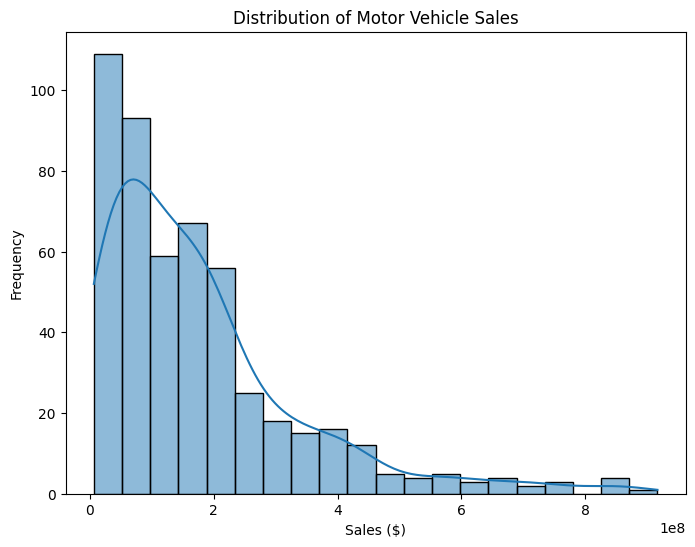

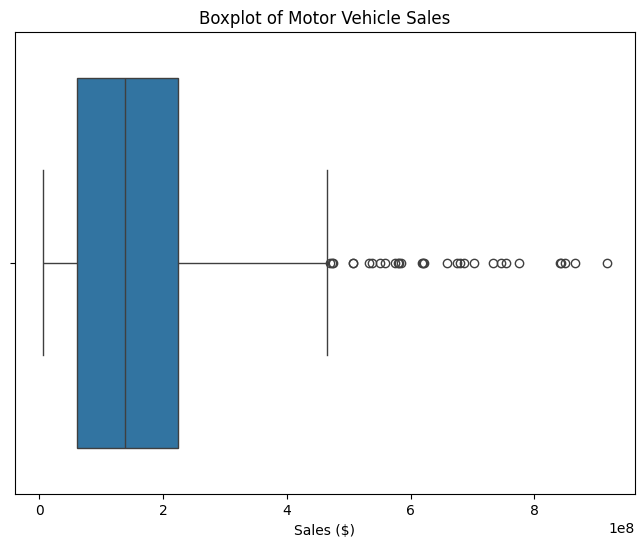

In [26]:
# Plot distribution of sales
plt.figure(figsize=(8, 6))
sns.histplot(data['sales'], bins=20, kde=True)
plt.title('Distribution of Motor Vehicle Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sales'])
plt.title('Boxplot of Motor Vehicle Sales')
plt.xlabel('Sales ($)')
plt.show()

In [27]:
data['year']= pd.to_numeric(data['year'], errors='coerce')

In [28]:
numeric_data = data.select_dtypes(include=[np.number])

In [29]:
correlation_matrix = numeric_data.corr()

In [30]:
print(correlation_matrix)

           year     sales
year   1.000000  0.172257
sales  0.172257  1.000000


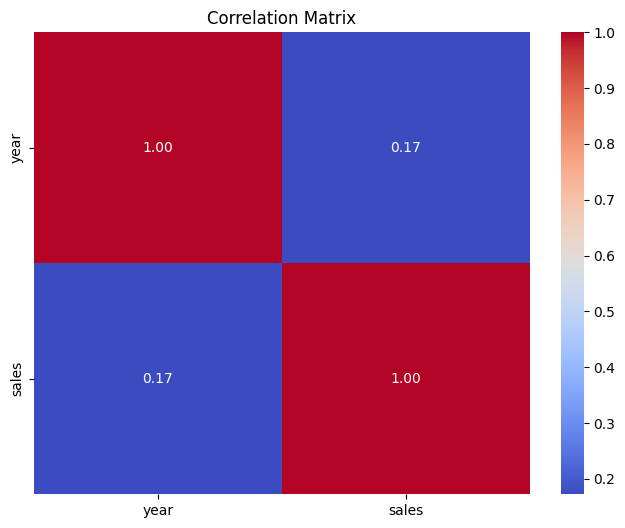

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Drop rows with missing values
data_clean = data.dropna()

# Select only numeric columns
numeric_data = data_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

           year     sales
year   1.000000  0.172257
sales  0.172257  1.000000


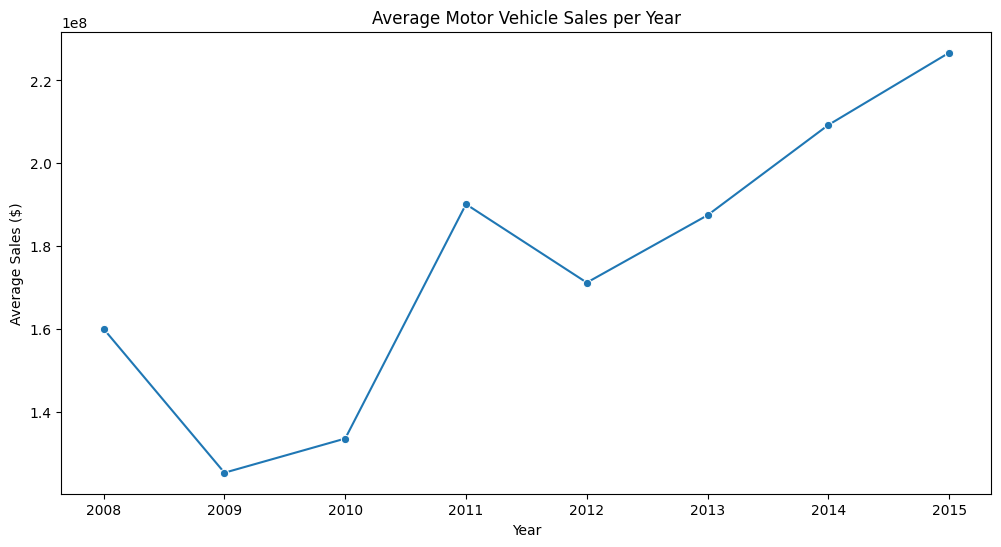

In [33]:
# Group by year to calculate average sales per year
average_sales_per_year = data.groupby('year')['sales'].mean().reset_index()

# Plot the trend of sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales', data=average_sales_per_year, marker='o')
plt.title('Average Motor Vehicle Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average Sales ($)')
plt.show()

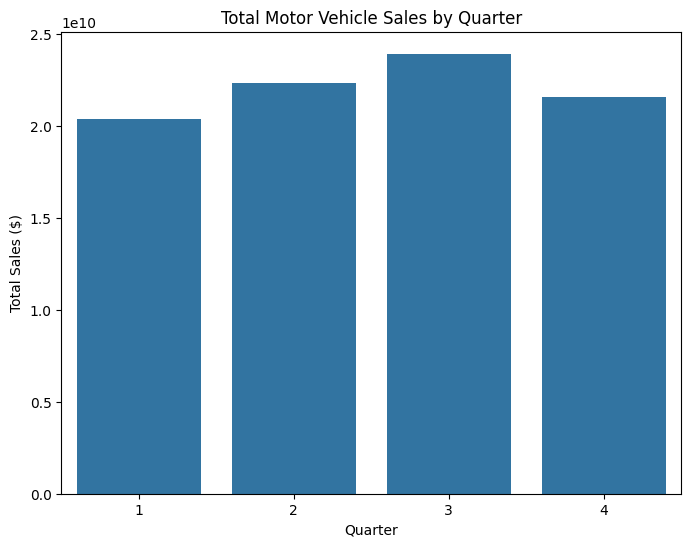

In [34]:
# Group by quarter to calculate total sales per quarter
sales_by_quarter = data.groupby('quarter')['sales'].sum().reset_index()

# Plot total sales per quarter
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='sales', data=sales_by_quarter)
plt.title('Total Motor Vehicle Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.show()

In [35]:
from scipy.stats import ttest_ind

# Separate data for Q1 and Q4
q1_sales = data[data['quarter'] == 'Q1']['sales']
q4_sales = data[data['quarter'] == 'Q4']['sales']

# Perform t-test
t_stat, p_value = ttest_ind(q1_sales, q4_sales)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


                county  count          mean           std          min  \
0                Adams   32.0  2.781911e+08  8.217812e+07  147150000.0   
1             Arapahoe   32.0  6.294476e+08  1.465202e+08  365064000.0   
2              Boulder   28.0  1.693761e+08  3.810552e+07  103053000.0   
3   Boulder/Broomfield    4.0  1.693002e+08  1.979308e+07  139785000.0   
4           Broomfield   28.0  3.669021e+07  7.207419e+06   22194000.0   
5               Denver   32.0  2.113629e+08  3.764978e+07  162119000.0   
6              Douglas   32.0  1.011404e+08  2.707156e+07   64458000.0   
7              El Paso   32.0  3.726889e+08  7.493149e+07  247017000.0   
8              Fremont   32.0  9.904344e+06  1.873455e+06    6274000.0   
9             Garfield   32.0  5.001856e+07  1.268212e+07   31249000.0   
10           Jefferson   32.0  2.830752e+08  6.454778e+07  181200000.0   
11            La Plata   32.0  2.477522e+07  6.520221e+06   13793000.0   
12             Larimer   32.0  1.67011

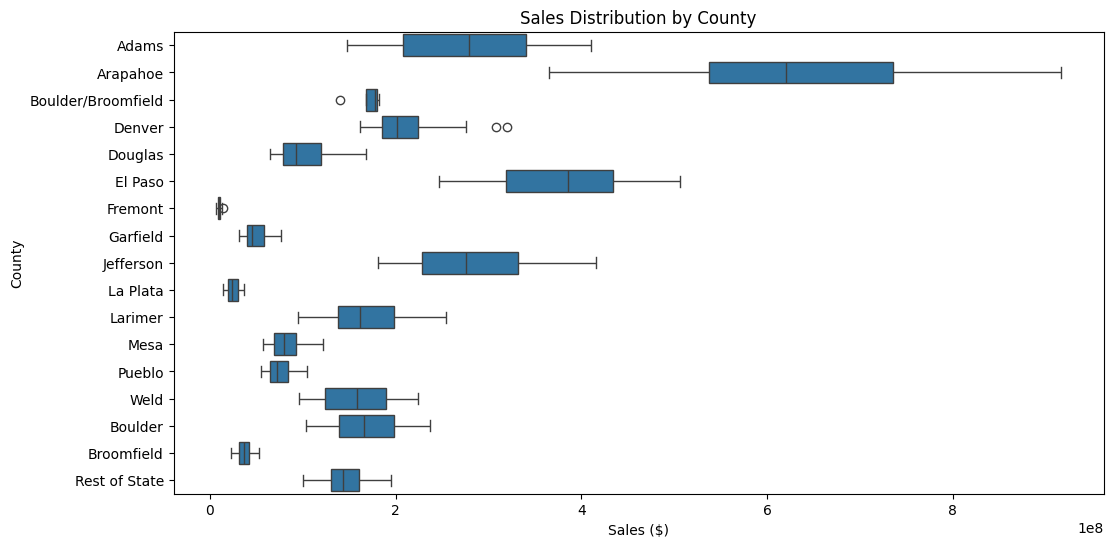

In [36]:
# Group by county to calculate basic statistics
sales_by_county_stats = data.groupby('county')['sales'].describe().reset_index()

# Display the statistics
print(sales_by_county_stats)

# Visualize sales distribution by county
plt.figure(figsize=(12, 6))
sns.boxplot(x='sales', y='county', data=data)
plt.title('Sales Distribution by County')
plt.xlabel('Sales ($)')
plt.ylabel('County')
plt.show()

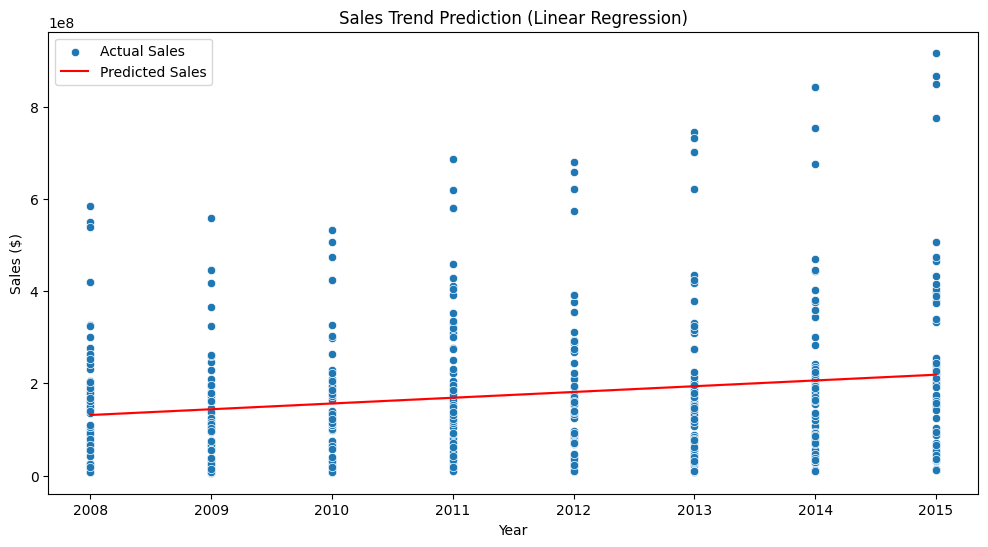

Intercept: -24926929130.607895, Coefficient: 12479295.725661572


In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X = data[['year']]  # Independent variable (year)
y = data['sales']   # Dependent variable (sales)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

#Create a new DataFrame for the predictions, combining 'year' and 'predictions'
predicted_data = pd.DataFrame({'year': data['year'], 'predictions':predictions})

# Plot the results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='sales', data=data, label='Actual Sales')
sns.lineplot(x='year', y='predictions', data=predicted_data, color='red', label='Predicted Sales')
plt.title('Sales Trend Prediction (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

# Print model coefficients
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

   year  predicted_sales
0  2025     3.436447e+08
1  2026     3.561240e+08
2  2027     3.686033e+08
3  2028     3.810826e+08
4  2029     3.935619e+08


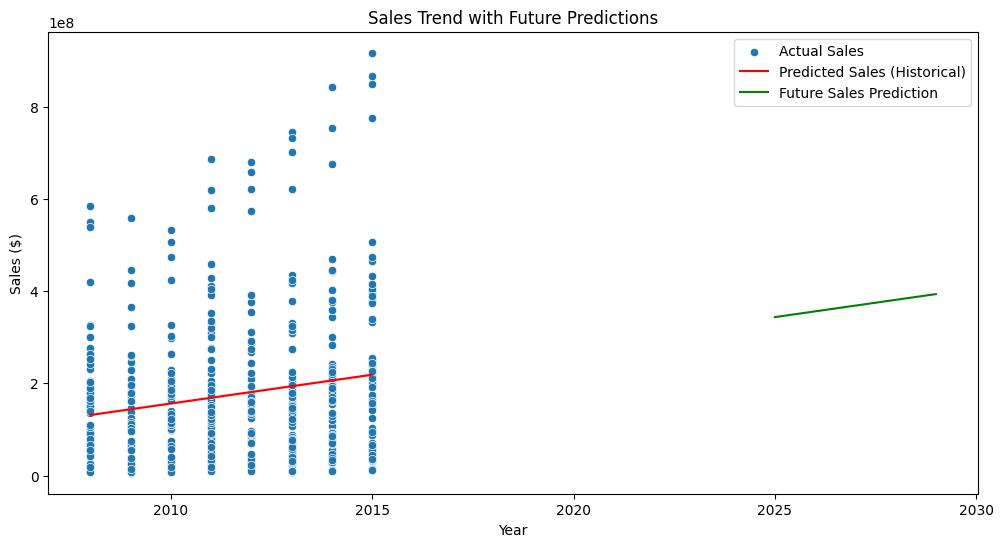

In [38]:

# Step 1: Prepare data for prediction (forecast for future years)
future_years = pd.DataFrame({'year': [2025, 2026, 2027, 2028, 2029]})  # Example: Forecast for the next 5 years

# Step 2: Predict future sales using the trained model
future_predictions = model.predict(future_years)

# Step 3: Create a DataFrame to display the predictions
future_sales = pd.DataFrame({
    'year': future_years['year'],
    'predicted_sales': future_predictions
})

print(future_sales)

# Optional: Plot the original data with the predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='sales', data=data, label='Actual Sales')
sns.lineplot(x='year', y='predictions', data=predicted_data, color='red', label='Predicted Sales (Historical)')
sns.lineplot(x='year', y='predicted_sales', data=future_sales, color='green', label='Future Sales Prediction')
plt.title('Sales Trend with Future Predictions')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
<ipython-input-39-2b17dc60ea3f>:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years_arima =

     year  predicted_sales
501  2025     2.115339e+08
502  2026     2.118616e+08
503  2027     2.118672e+08
504  2028     2.118673e+08


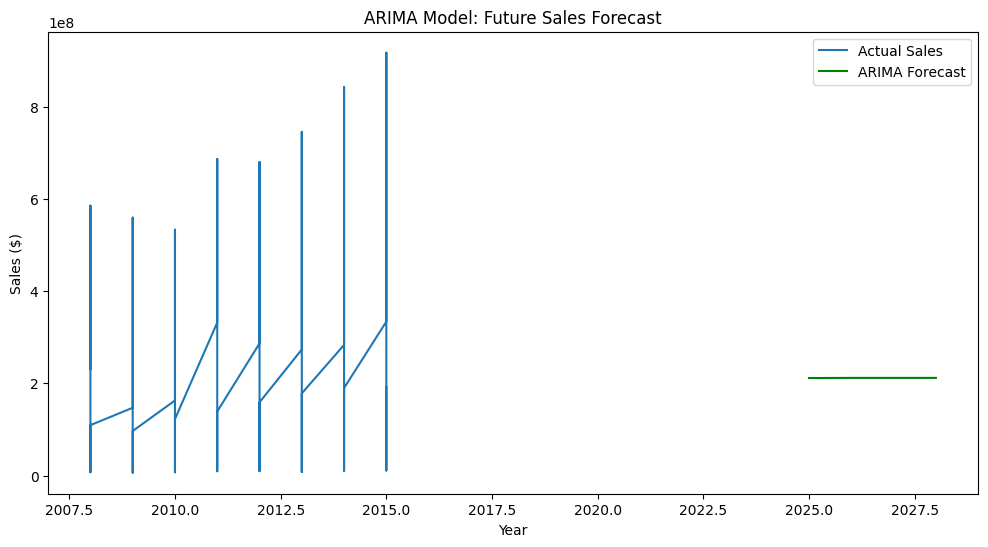

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data (ensure 'year' is set as the index)
# Create a time series with 'year' as the index and 'sales' as the values
data_ts = data.set_index('year')['sales']

# Step 2: Fit the ARIMA model
# ARIMA model requires choosing the order (p, d, q), which we'll set as (1, 1, 1) for this example
arima_model = ARIMA(data_ts, order=(1, 1, 1))

# Fit the model to the data
arima_model_fit = arima_model.fit()

# Step 3: Make future predictions
# Predict the next 5 years (e.g., 2025–2029)
future_years_arima = pd.date_range(start='2025', end='2029', freq='Y')
future_sales_arima = arima_model_fit.predict(start=len(data_ts), end= len(data_ts) +len(future_years_arima) -1 , typ='levels')

# Step 4: Create a DataFrame to show the forecasted sales
future_sales_arima_df = pd.DataFrame({
    'year': future_years_arima. year,
    'predicted_sales': future_sales_arima
})

print(future_sales_arima_df)

# Optional: Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data_ts, label='Actual Sales')
plt.plot(future_sales_arima_df['year'], future_sales_arima_df['predicted_sales'], color='green', label='ARIMA Forecast')
plt.title('ARIMA Model: Future Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Example: Evaluate on the model's predictions against actual data (train data)
predictions_train = model.predict(X)

mae = mean_absolute_error(y, predictions_train)
mse = mean_squared_error(y, predictions_train)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 117556909.86541288, MSE: 2.6111154678106084e+16, RMSE: 161589463.3882608


In [41]:
import matplotlib.pyplot as plt
plt.savefig('sales_trend.png')

<Figure size 640x480 with 0 Axes>

In [42]:
plt.savefig("sales_trend_plot.png")

<Figure size 640x480 with 0 Axes>

In [43]:
# Advanced Forecasting Techniques:
#SARIMA (Seasonal ARIMA): Given the seasonal nature of the data (quarterly), consider using SARIMA (Seasonal ARIMA), which extends ARIMA
# by including seasonal components in the model. It can capture both seasonal and non-seasonal trends in the data.
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(data_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))  # Adjust parameters based on ACF/PACF
sarima_results = sarima_model.fit()
print(sarima_results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                  501
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood              -10204.289
Date:                           Wed, 01 Jan 2025   AIC                          20418.579
Time:                                   18:06:35   BIC                          20439.612
Sample:                                        0   HQIC                         20426.835
                                           - 501                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1937      0.250      0.773      0.439      -0.297       0.685
ma.L1         -0.9735      0.096    -10.092

In [48]:
from prophet import Prophet


In [49]:
!pip install prophet


In [52]:
!pip uninstall fbprophet
!pip install prophet
from prophet import Prophet


In [62]:
#Random Forest or XGBoost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data[['year', 'quarter', 'county']]  # You can also include lagged features here
y = data['sales']
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [63]:
# cross- validation
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))


0.9308348632325227
0.7724659450129299
0.9341338579376022
0.9629617082997369
0.963897530285014


<Axes: xlabel='county', ylabel='sales'>

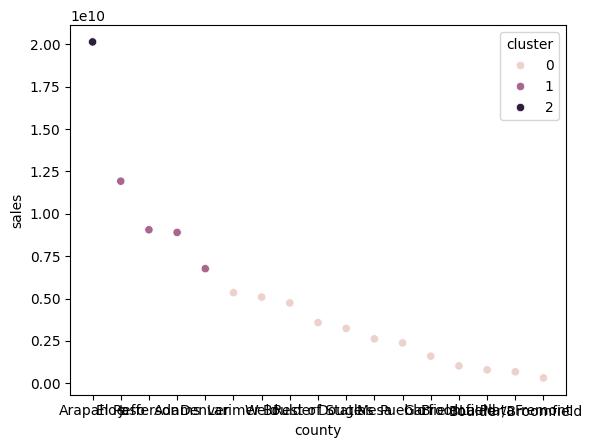

In [66]:
#Cluster Analysis for County Segmentation:
#Use K-means clustering or hierarchical clustering to segment counties based on sales behavior

from sklearn.cluster import KMeans
counties_sales = sales_by_county[['county', 'sales']]
kmeans = KMeans(n_clusters=3, random_state=42)
sales_by_county['cluster'] = kmeans.fit_predict(counties_sales[['sales']])

sns.scatterplot(x='county', y='sales', hue='cluster', data=sales_by_county)


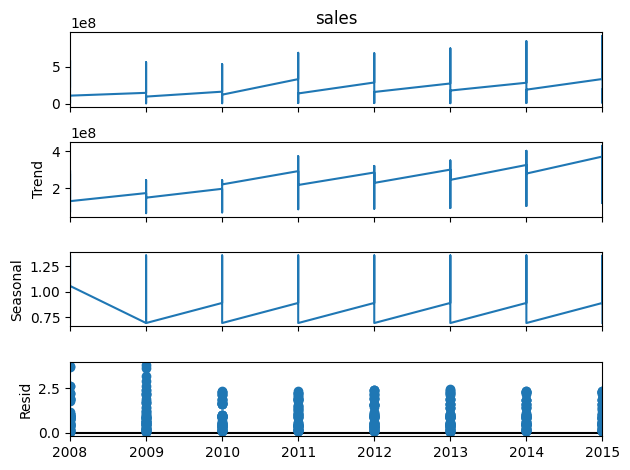

In [67]:
# Deeper Time Series Analysis:
#Seasonality and Trend Decomposition:

decomposition = seasonal_decompose(data_ts, model='multiplicative', period=4)  # Assuming quarterly data
decomposition.plot()
plt.show()


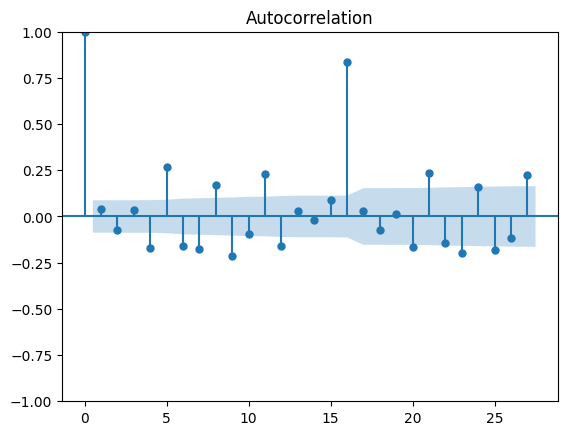

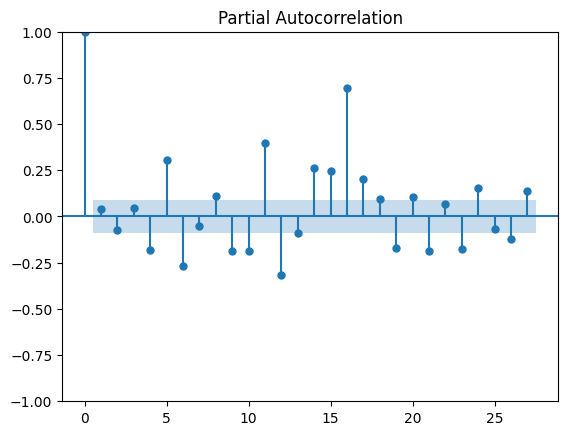

In [68]:
#Autocorrelation and Partial Autocorrelation:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_ts)
plot_pacf(data_ts)
plt.show()


In [70]:
# Feature Engineering for Predictive Models:
#Quarter and Year Effects:
data['month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['quarter'].astype(str) + '-01').dt.month
data['quarter'] = data['quarter'].astype('category')
#Lag Features:
data['lag_sales'] = data['sales'].shift(1)  # Lag of 1 quarter
data.dropna(inplace=True)


In [71]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=42a03d8d954dd792d3cb6cb70a0d1e07e7c8f5f4384467a9ce62d684f5d544d6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [72]:
data = pd.read_csv('/content/colorado_motor_vehicle_sales.csv')

In [73]:
#Generate the profile report
profile = ProfileReport(data, title="Comprehensive Data Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile_report.html")

print("Profile report saved as 'data_profile_report.html'")

#  Display the report inline (optional, for exploration in Colab)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profile report saved as 'data_profile_report.html'


In [74]:
# for downloading to your machine
from google.colab import files
files.download("data_profile_report.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>